# FORECASTNG STOCK MARKET TRENDS

EDS 6340 INTRODUCTION TO DATA SCIENCE

GROUP 16


| **Name**                | **ID**      |
|-------------------------|-------------|
| Sai Shashank Gandavarapu | 2402666     |
| Aakanksha Govindaraju    | 2384001     |
| Gowtham Chowdam          | 2397801     |
| Kiran Kulkarni           | 2330104     |
| Nagesh Vaka              | 2407326     |


## Importing Packages

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score


## Load the Dataset

In [ ]:
df = pd.read_csv('Cleaned&Processed_Data.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head(15)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,DJI,S&P
0,2009-12-31,10428.049805,0.515598,0.014951,0.014951,0.014951,0.014951,1.823357,1.741463,-2.216996,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.000640,0.000697
1,2009-12-31,1115.099976,-0.001074,0.016043,0.016043,0.016043,0.016043,2.679581,1.876967,-1.642897,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.000697
2,2009-12-31,2269.149902,0.000000,0.017306,0.017306,0.017306,0.017306,2.116212,0.830271,-2.571441,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.000697
3,2009-12-31,7184.959961,-0.001183,0.019733,0.019733,0.019733,0.019733,3.345741,2.391525,-1.556447,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.016043
4,2009-12-31,625.390015,-0.001074,0.023521,0.023521,0.023521,0.023521,3.065284,2.009947,-1.164078,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.016043
5,2010-01-04,10583.959961,0.515598,0.014951,0.014951,0.014951,0.014951,1.823357,1.741463,-2.216996,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.000640,0.000697
6,2010-01-04,2308.419922,0.000000,0.017306,0.017306,0.017306,0.017306,2.116212,0.830271,-2.571441,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.000697
7,2010-01-04,1132.989990,-0.001074,0.016043,0.016043,0.016043,0.016043,2.679581,1.876967,-1.642897,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.000697
8,2010-01-04,7326.740234,-0.001183,0.019733,0.019733,0.019733,0.019733,3.345741,2.391525,-1.556447,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.016043
9,2010-01-04,640.099976,-0.001074,0.023521,0.023521,0.023521,0.023521,3.065284,2.009947,-1.164078,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.016043


## Feature Selection And Feature Engineering

In [ ]:
# Identify correlated features
correlated_features = df.corr(numeric_only=True)['Close'].sort_values(ascending=False)
print(correlated_features)

high_correlation_threshold = 0.6
high_positive_corr_features = correlated_features[correlated_features > high_correlation_threshold].index.tolist()
high_negative_corr_features = correlated_features[correlated_features < -high_correlation_threshold].index.tolist()


Close      1.000000
EMA_10     0.999873
EMA_20     0.999739
EMA_50     0.999420
EMA_200    0.998304
             ...   
DE6       -0.189357
DE5       -0.190716
DE4       -0.194123
Volume    -0.575212
Name      -0.751572
Name: Close, Length: 85, dtype: float64


In [ ]:
data_numeric = df.drop(['Date', 'Name'], axis=1)
correlation_matrix = data_numeric.corr()
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.8) & (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2'])]

print("Highly correlated feature pairs:")
print(high_corr_pairs)

Highly correlated feature pairs:
            Feature1        Feature2  Correlation
10             Close          EMA_10     0.999873
11             Close          EMA_20     0.999739
12             Close          EMA_50     0.999420
13             Close         EMA_200     0.998304
231              mom           DJI-F     0.803152
...              ...             ...          ...
6374           S&P-F       RUSSELL-F     0.801743
6546  Dollar index-F    Dollar index     0.988209
6629    Dollar index  Dollar index-F     0.988209
6793             XAG        silver-F     0.827305
6951             DJI           DJI-F     0.826549

[134 rows x 3 columns]


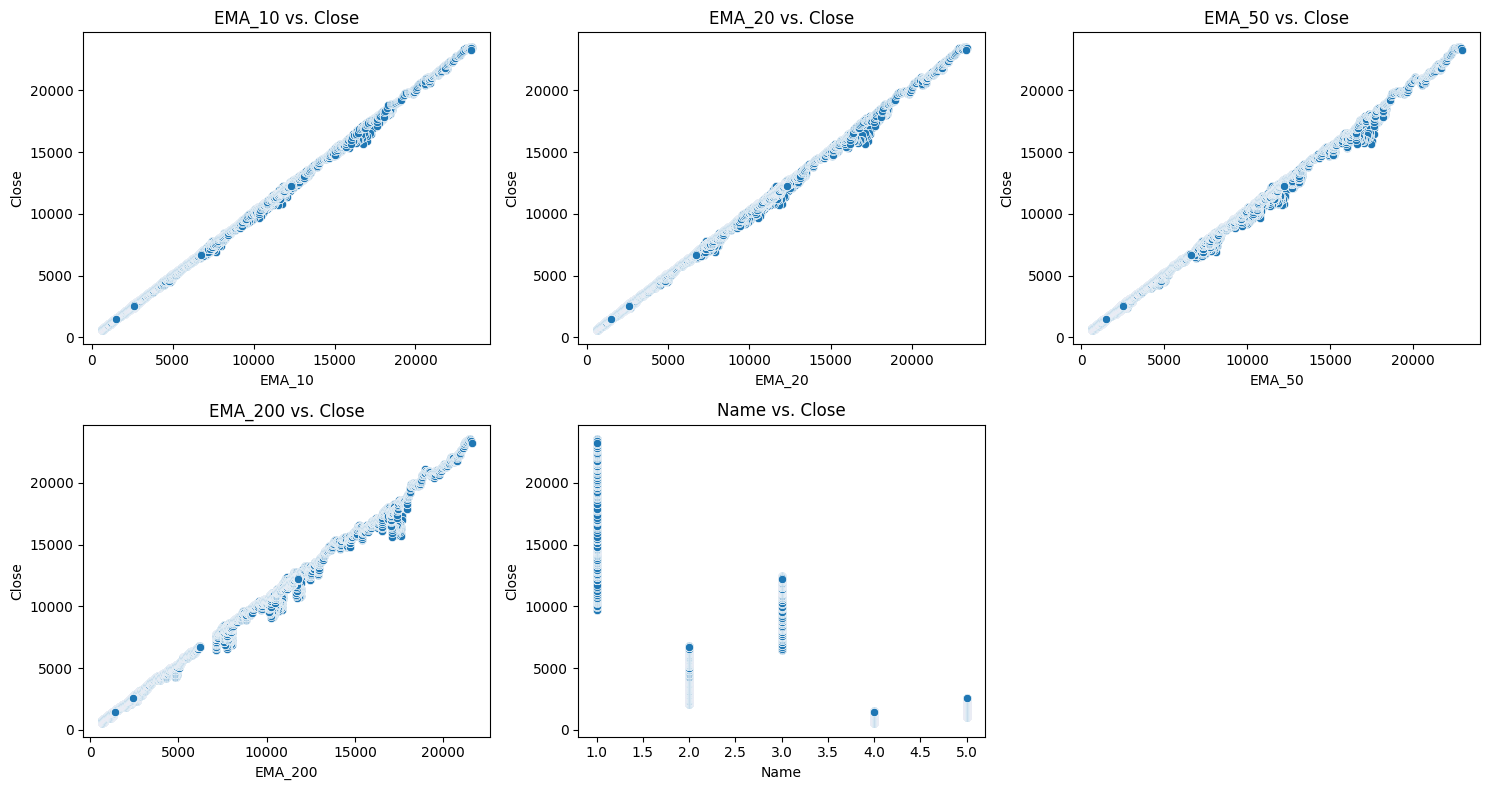

In [ ]:
correlated_features = high_positive_corr_features + high_negative_corr_features
correlated_features = [feature for feature in correlated_features if feature != 'Close']
grid_cols = 3
grid_rows = math.ceil(len(correlated_features) / grid_cols)
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 5, grid_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(correlated_features):
    sns.scatterplot(x=feature, y='Close', data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs. Close')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Close')

for i in range(len(correlated_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_RollingMean'] = df['Close'].rolling(window=3).mean()
df = df.dropna()

print(df[['Close', 'Close_Lag1', 'Close_Lag2', 'Close_RollingMean']].head())

          Close    Close_Lag1    Close_Lag2  Close_RollingMean
2   2269.149902   1115.099976  10428.049805        4604.099894
3   7184.959961   2269.149902   1115.099976        3523.069946
4    625.390015   7184.959961   2269.149902        3359.833293
5  10583.959961    625.390015   7184.959961        6131.436646
6   2308.419922  10583.959961    625.390015        4505.923299


In [ ]:
# Select correlated features
selected_features = [
    'mom',          # Momentum
    'EMA_10',       # Strong EMA correlation with Close
    'S&P-F',        # Market index tied to mom
    'DGS10',        # Interest rate capturing macro trends
    'Oil',          # Commodity market influence
    'Dollar index', # Currency index
    'FTSE-F',       # Global market trends
    'HSI'           # Regional market trends
]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(df[selected_features])
interaction_feature_names = poly.get_feature_names_out(selected_features)
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)
df_Corr = df.copy()
df = pd.concat([df_Corr, interaction_df], axis=1)

print("Interaction features added:", interaction_feature_names)

Interaction features added: ['mom' 'EMA_10' 'S&P-F' 'DGS10' 'Oil' 'Dollar index' 'FTSE-F' 'HSI'
 'mom EMA_10' 'mom S&P-F' 'mom DGS10' 'mom Oil' 'mom Dollar index'
 'mom FTSE-F' 'mom HSI' 'EMA_10 S&P-F' 'EMA_10 DGS10' 'EMA_10 Oil'
 'EMA_10 Dollar index' 'EMA_10 FTSE-F' 'EMA_10 HSI' 'S&P-F DGS10'
 'S&P-F Oil' 'S&P-F Dollar index' 'S&P-F FTSE-F' 'S&P-F HSI' 'DGS10 Oil'
 'DGS10 Dollar index' 'DGS10 FTSE-F' 'DGS10 HSI' 'Oil Dollar index'
 'Oil FTSE-F' 'Oil HSI' 'Dollar index FTSE-F' 'Dollar index HSI'
 'FTSE-F HSI']


## Dataset Spliting And Scaling

In [ ]:
def scale_data(df_X, df_y):
  numerical_features_X = df_X.select_dtypes(include=['number']).columns

  if isinstance(df_y, pd.Series):
    df_y = df_y.to_frame()

  numerical_features_y = df_y.select_dtypes(include=['number']).columns
  scaler_X = MinMaxScaler()
  scaler_y = MinMaxScaler()

  df_X_scaled = df_X.copy()
  df_y_scaled = df_y.copy()
  df_X_scaled[numerical_features_X] = scaler_X.fit_transform(df_X[numerical_features_X])
  df_y_scaled[numerical_features_y] = scaler_y.fit_transform(df_y[numerical_features_y])

  return df_X_scaled, df_y_scaled.squeeze()

In [ ]:
df.dropna(inplace=True)
y = df['Close']
X = df.drop("Close", axis=1)
X['Date'] = pd.to_datetime(X['Date'], errors='coerce')
X['Date'] = X['Date'].apply(lambda date: date.toordinal() if pd.notnull(date) else pd.NaT)
X['Date'] = pd.to_numeric(X['Date'], errors='coerce')



In [ ]:
train_size = int(0.8 * len(X))
train = X.iloc[:train_size]
test = X.iloc[train_size:]

X_train, y_train = train, y.iloc[:train_size]
X_test, y_test = test, y.iloc[train_size:]

X_train, y_train = scale_data(X_train, y_train)
X_test, y_test = scale_data(X_test, y_test)

## Bi-Directional Elimination

Bi-directional Elimination is a feature selection technique that combines the strengths of both Forward Selection and Backward Elimination. It starts with either an empty set of features or the full set and iteratively adds or removes features based on a predefined significance level. This approach allows for a more comprehensive search of the feature space, potentially leading to a more optimal subset of features.

In [ ]:
def bi_directional_elimination(X, y, model, scoring='neg_mean_squared_error', max_iter=30):
    remaining_features = list(X.columns)
    selected_features = []
    best_score = float('inf')
    iteration = 0

    while remaining_features and iteration < max_iter:
        iteration += 1
        print(f"Iteration {iteration}")

        # Step 1: Forward Selection
        forward_scores = {}
        for feature in remaining_features:
            current_features = selected_features + [feature]
            model.fit(X[current_features], y)
            y_pred = model.predict(X[current_features])
            score = mean_squared_error(y, y_pred)
            forward_scores[feature] = score

        # Find the best feature to add
        best_forward_feature = min(forward_scores, key=forward_scores.get)
        best_forward_score = forward_scores[best_forward_feature]

        if best_forward_score < best_score:
            selected_features.append(best_forward_feature)
            remaining_features.remove(best_forward_feature)
            best_score = best_forward_score
            print(f"  Added Feature: {best_forward_feature}, Score: {best_forward_score:.6f}")
        else:
            print("  No improvement in forward selection.")
            break

        # Step 2: Backward Elimination
        backward_scores = {}
        for feature in selected_features:
            current_features = [f for f in selected_features if f != feature]
            if not current_features:
                print("  Skipping backward elimination - no features to remove.")
                continue
            model.fit(X[current_features], y)
            y_pred = model.predict(X[current_features])
            score = mean_squared_error(y, y_pred)
            backward_scores[feature] = score

        # Find the worst feature to remove
        if backward_scores:
            worst_backward_feature = min(backward_scores, key=backward_scores.get)
            worst_backward_score = backward_scores[worst_backward_feature]

            if worst_backward_score < best_score:
                selected_features.remove(worst_backward_feature)
                remaining_features.append(worst_backward_feature)
                best_score = worst_backward_score
                print(f"  Removed Feature: {worst_backward_feature}, Score: {worst_backward_score:.6f}")
            else:
                print("  No improvement in backward elimination.")

    print("\nSelected Features:", selected_features)
    return selected_features

In [ ]:
# Define the model
GBR_model = GradientBoostingRegressor(random_state=42, learning_rate= 0.1, n_estimators= 100)

# Perform bi-directional elimination
selected_features = bi_directional_elimination(X_train, y_train, GBR_model)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Refit the model with selected features
GBR_model.fit(X_train_selected, y_train)
y_test_pred = GBR_model.predict(X_test_selected)

# Evaluate the final model
mse = mean_squared_error(y_test, y_test_pred)
r2 = GBR_model.score(X_test_selected, y_test)

print(f"\nFinal Model Performance:")
print(f"Test MSE: {mse:.6f}")
print(f"Test R^2: {r2:.6f}")


Iteration 1
  Added Feature: EMA_10, Score: 0.000025
  Skipping backward elimination - no features to remove.
Iteration 2
  Added Feature: ROC_5, Score: 0.000013
  No improvement in backward elimination.
Iteration 3
  Added Feature: ROC_10, Score: 0.000011
  No improvement in backward elimination.
Iteration 4
  Added Feature: ROC_20, Score: 0.000010
  No improvement in backward elimination.
Iteration 5
  Added Feature: ROC_15, Score: 0.000010
  No improvement in backward elimination.
Iteration 6
  Added Feature: DGS10, Score: 0.000010
  No improvement in backward elimination.
Iteration 7
  Added Feature: IXIC, Score: 0.000010
  No improvement in backward elimination.
Iteration 8
  Added Feature: DE6, Score: 0.000010
  No improvement in backward elimination.
Iteration 9
  Added Feature: EMA_50, Score: 0.000010
  No improvement in backward elimination.
Iteration 10
  Added Feature: mom FTSE-F, Score: 0.000010
  No improvement in backward elimination.
Iteration 11
  Added Feature: AAPL, S

Selected Features: ['EMA_10', 'ROC_5', 'ROC_10', 'ROC_20', 'ROC_15', 'DGS10', 'IXIC', 'DE6', 'EMA_50', 'Name', 'mom FTSE-F', 'AAPL', 'Oil Dollar index']


## Refitting the best performing model

In [ ]:
df.dropna(inplace=True)
y = df['Close']
X = df.drop("Close", axis=1)
X = X[['EMA_10', 'ROC_5', 'ROC_10', 'ROC_20', 'ROC_15', 'DGS10', 'IXIC', 'DE6', 'EMA_50', 'mom FTSE-F', 'AAPL', 'Oil Dollar index']]

In [ ]:
train_size = int(0.8 * len(X))
train = X.iloc[:train_size]
test = X.iloc[train_size:]

X_train, y_train = train, y.iloc[:train_size]
X_test, y_test = test, y.iloc[train_size:]

X_train, y_train = scale_data(X_train, y_train)
X_test, y_test = scale_data(X_test, y_test)

In [ ]:
# Define the model
GBR_model = GradientBoostingRegressor(random_state=42, learning_rate= 0.1, n_estimators= 100)

# Refit the model with selected features
GBR_model.fit(X_train, y_train)
y_test_pred = GBR_model.predict(X_test)

# Evaluate the final model
mse = mean_squared_error(y_test, y_test_pred)
r2 = GBR_model.score(X_test, y_test)

print(f"\nFinal Model Performance:")
print(f"Test MSE: {mse:.6f}")
print(f"Test R^2: {r2:.6f}")


Final Model Performance:
Test MSE: 0.000031
Test R^2: 0.999681


## Model Evaluation And Model performance visualization

In [ ]:
y_train_pred = GBR_model.predict(X_train)

# Training performance
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}, R^2: {train_r2}")
print(f"Testing MSE: {test_mse}, R^2: {test_r2}")
rmse = np.sqrt(test_mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_test_pred)
print(f"MAE: {mae}")

Training MSE: 8.231936340421606e-06, R^2: 0.9999066086439913
Testing MSE: 3.058344036039317e-05, R^2: 0.9996807884270976
RMSE: 0.00553022968423493
MAE: 0.0033841187444706307


In [ ]:
cv_scores = cross_val_score(GBR_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())

Cross-Validation MSE Scores: [1.82801134e-05 3.60735396e-05 9.92504880e-05 1.41464349e-05
 4.98531601e-05]
Mean CV MSE: 4.352074718934113e-05


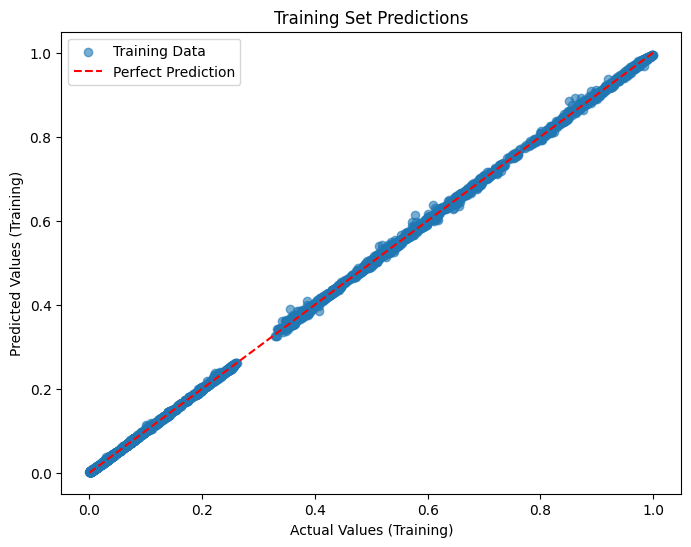

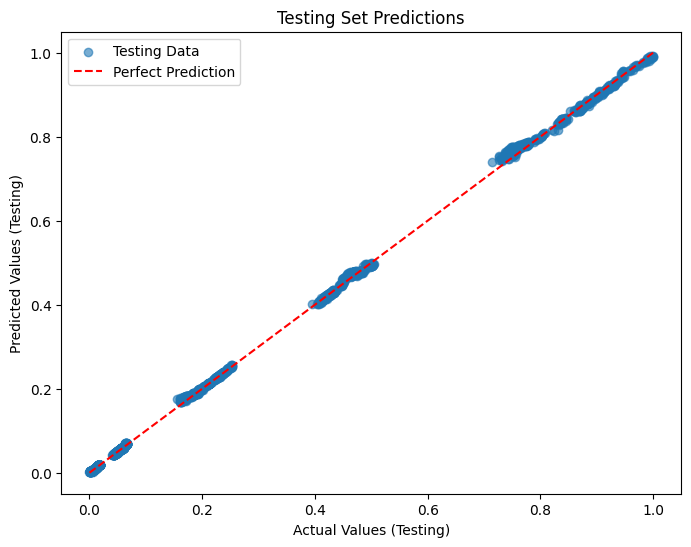

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training Set Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, label='Testing Data', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Testing Set Predictions")
plt.legend()
plt.show()

From the above evaluation metrics and visualization plot, we can say that "Gradient Boosting Regressor" is performing really good and improved significantly with
Bi-Directional Elimination. The MSE is really low which means low error and R2 is really high which shows no signs of variability. It shows no signs of overfitting or underfitting in our model.